###**Predicting Medical Expenses Using Linear Regression**

> **Problem Statement:** ACME Insurance Inc. offers affordable health insurance to thousands of customers throughout the United States. As the lead data scientist at ACME, you're tasked with creating an automated system to estimate the annual medical expenditure for new customers, using information such as their age, sex, BMI, children, smoking habits and region of residence.



###Downloading the Data

In [73]:
medical_charges_url='https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv'
from urllib.request import urlretrieve
urlretrieve(medical_charges_url, 'medical.csv')

('medical.csv', <http.client.HTTPMessage at 0x79016e8d8a60>)

In [74]:
#!pip install pandas --quiet

In [75]:
import pandas as pd

In [76]:
medical_df= pd.read_csv('medical.csv')

In [77]:
medical_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [78]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [79]:
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


###Exploratory Analysis and Visualization

In [80]:
!pip install plotly matplotlib seaborn --quiet

In [81]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [82]:
sns.set_style("darkgrid")
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10,6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [83]:
medical_df.age.describe()

,age
count,1338.000000
mean,39.207025
std,14.049960
min,18.000000
25%,27.000000
50%,39.000000
75%,51.000000
max,64.000000


In [84]:
fig = px.histogram(x= medical_df['age'],marginal = 'box',title= 'Distribution of Age', nbins=47)
fig.update_layout(xaxis_title='age',yaxis_title='count',bargap=0.1)
fig.show();

In [85]:
#BMI
fig= px.histogram(medical_df,x= 'bmi', marginal='box', color_discrete_sequence=['red'], title='Distribution of bmi')
fig.update_layout(bargap=0.1)
fig.show()

In [86]:
fig = px.histogram(medical_df, x='charges', marginal='box',color='smoker', color_discrete_sequence=['green','grey'], title='Distribution of charges')
fig.update_layout(bargap=0.1)
fig.show()

In [87]:
fig = px.histogram(medical_df, x='charges', marginal='box',color='sex', color_discrete_sequence=['pink','blue'], title='Distribution of charges')
fig.update_layout(bargap=0.1)
fig.show()

In [88]:
fig = px.histogram(medical_df, x='charges', marginal='box',color='region', color_discrete_sequence=['red','violet','green','grey'], title='Distribution of charges')
fig.update_layout(bargap=0.1)
fig.show()

In [89]:
medical_df['smoker'].value_counts()

,count
smoker,
no,1064
yes,274


In [90]:
px.histogram(medical_df, x='smoker', color='sex', title='smoker')

In [91]:
fig= px.scatter(medical_df, x='age', y='charges', title='age vs charges', color='smoker', opacity=0.8, hover_data=['bmi'])
fig.update_traces(marker_size=5)
fig.show()

In [92]:
fig= px.scatter(medical_df, x='bmi', y='charges', title='bmi vs charges', color='smoker', opacity=0.8, hover_data=['sex'])
fig.update_traces(marker_size=5)
fig.show()

In [93]:
px.violin(medical_df,x='children',y='charges' )

###Correlation between different elements

In [94]:
medical_df.charges.corr(medical_df.age)

0.2990081933306476

In [95]:
medical_df.charges.corr(medical_df.bmi)

0.19834096883362895

In [96]:
smoker_numeric= medical_df.smoker.map({'yes':1, 'no':0})
medical_df.charges.corr(smoker_numeric)

0.787251430498478

In [97]:
medical_df.drop(columns=['sex','smoker','region']).corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


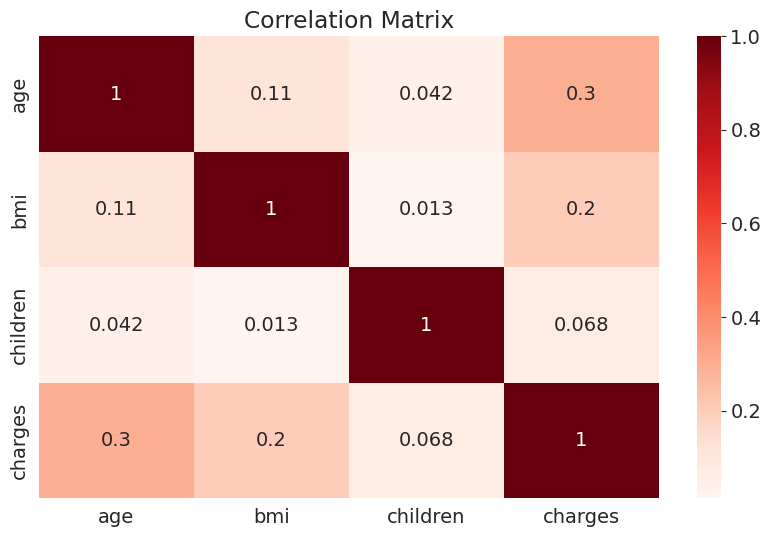

In [98]:
sns.heatmap(medical_df.drop(columns=['sex','smoker','region']).corr(), cmap='Reds',annot=True);
plt.title('Correlation Matrix');

###Linear Regression Using A Single Feature

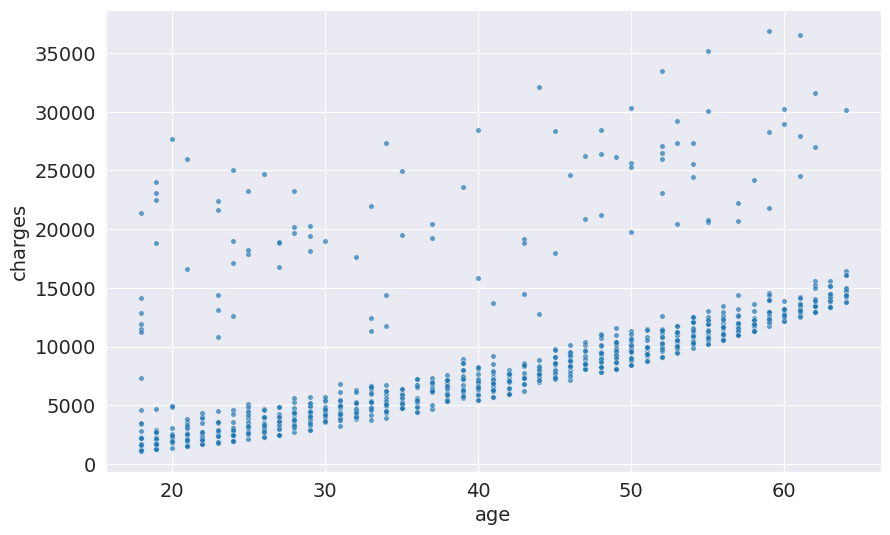

In [99]:
non_smoker_df= medical_df[medical_df['smoker'] =='no']
sns.scatterplot(non_smoker_df, x='age', y='charges',alpha=0.7,s=15);

In [100]:
def estimate_charges(age,w,b):
  return w * age + b

In [101]:
w=50
b=100

In [102]:
ages=non_smoker_df.age
estimated_charges=estimate_charges(ages,w,b)

In [103]:
def try_parameters(w,b):
  ages=non_smoker_df.age
  estimated_charges=estimate_charges(ages,w,b)

  plt.plot(ages,estimated_charges,'r-', alpha=0.9);
  sns.scatterplot(x=ages,y=non_smoker_df.charges,s=8,alpha=0.8);
  plt.xlabel('Age');
  plt.ylabel('Estimated charges');
  plt.legend(['Estimated Charges', 'Actual']);

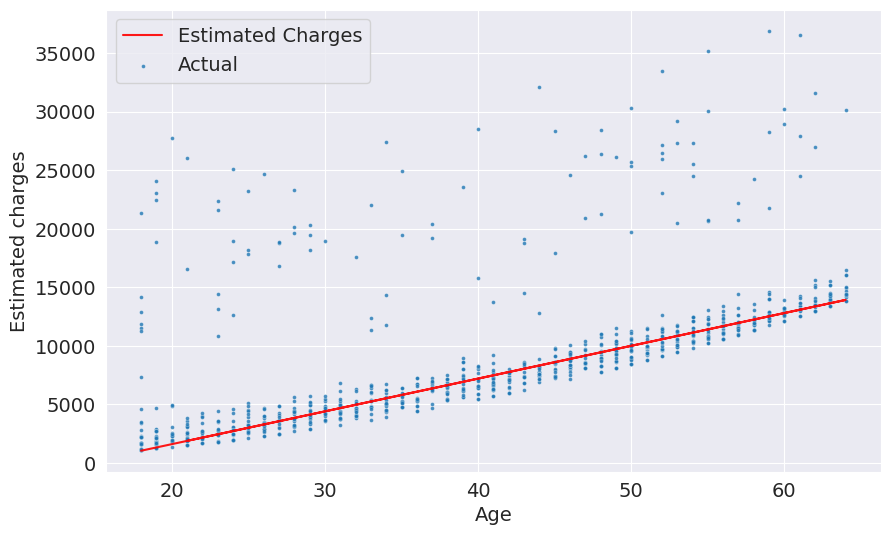

In [104]:
try_parameters(280,-4000)

In [105]:
!pip install numpy --quiet
import numpy as np

In [106]:
def rmse(targets, predictions):
  return np.sqrt(np.mean(np.square(targets - predictions)))

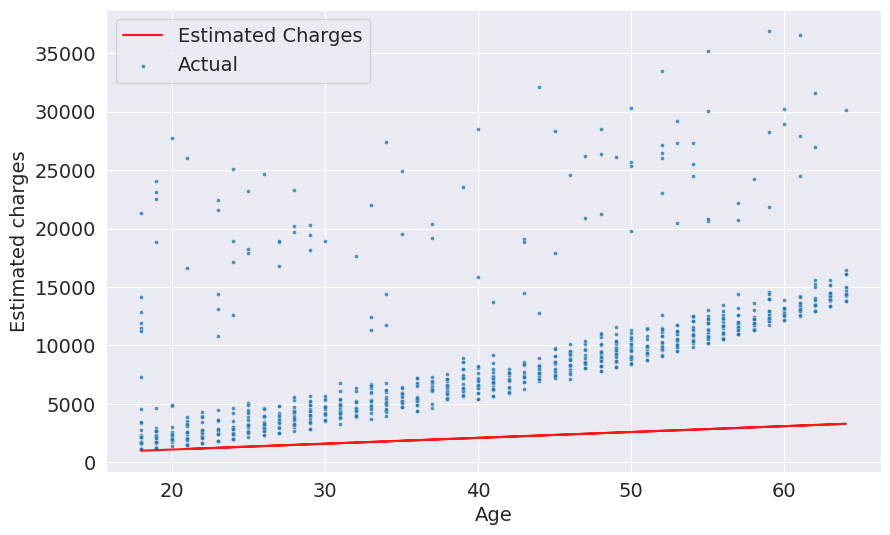

In [107]:
w=50
b=100
try_parameters(w,b)

In [108]:
targets= non_smoker_df.charges
predicted= estimate_charges(non_smoker_df.age,w,b)

In [109]:
rmse(targets, predicted)

8461.949562575493

In [110]:
def try_parameters(w,b):
  ages=non_smoker_df.age
  predictions=estimate_charges(ages,w,b)
  target= non_smoker_df.charges

  plt.plot(ages,predictions,'r-', alpha=0.9);
  plt.scatter(ages,target,s=8,alpha=0.8);
  plt.xlabel('Age')
  plt.ylabel('Charges');
  plt.legend(['Estimated Charges', 'Actual']);

  loss = rmse(target,predictions)
  print("RMSE LOSS: ", loss)

RMSE LOSS:  4706.55521953607


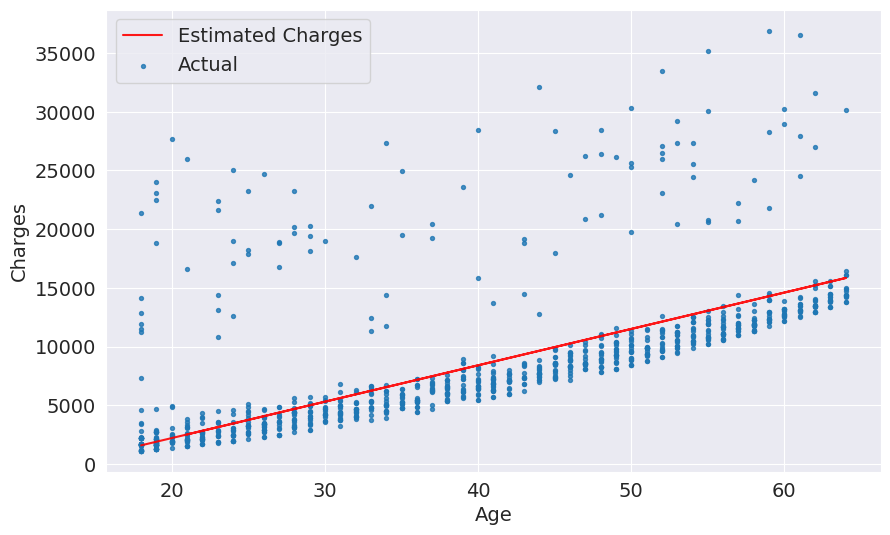

In [111]:
try_parameters(310,-4000);

###Linear Regression using Scikit-learn

In [112]:
!pip install scikit-learn --quiet

In [113]:
from sklearn.linear_model import LinearRegression

In [114]:
model = LinearRegression()
inputs= non_smoker_df[['age']]
targets= non_smoker_df.charges

In [115]:
type(inputs)
#type(targets)

pandas.core.frame.DataFrame

In [116]:
#given some inputs and the associated target values for the model to check
model.fit(inputs,targets)

LinearRegression()

In [117]:
model.predict(np.array([
    [23],[37],[61]
]))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([ 4055.30443855,  7796.78921819, 14210.76312614])

In [118]:
predictions = model.predict(inputs)
predictions

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289])

In [119]:
inputs

,age
1,18
2,28
3,33
4,32
5,31
...,...
1332,52
1333,50
1334,18
1335,18


In [120]:
targets.head()

,charges
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
5,3756.62160


In [121]:
rmse(targets,predictions)

4662.505766636395

RMSE LOSS:  4662.505766636395


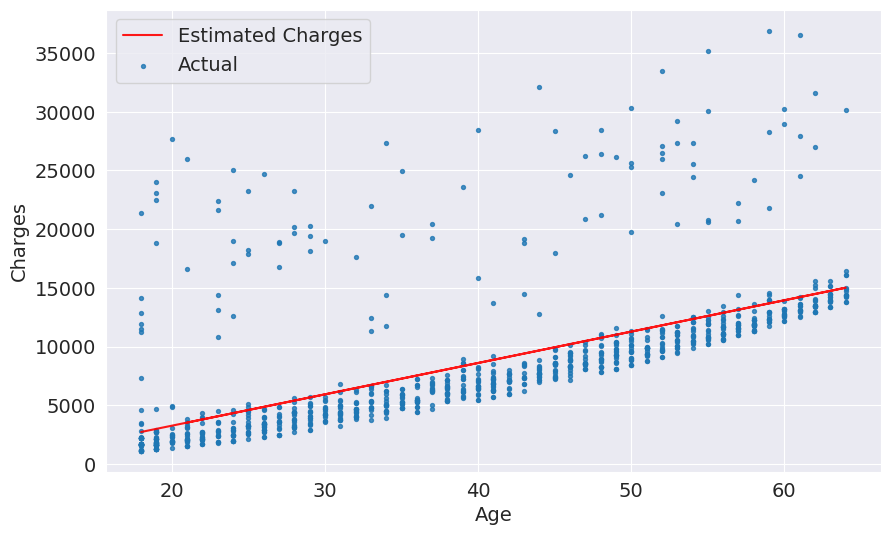

In [122]:
try_parameters(model.coef_,model.intercept_)

5442.627125134379
RMSE LOSS:  5442.627125134379


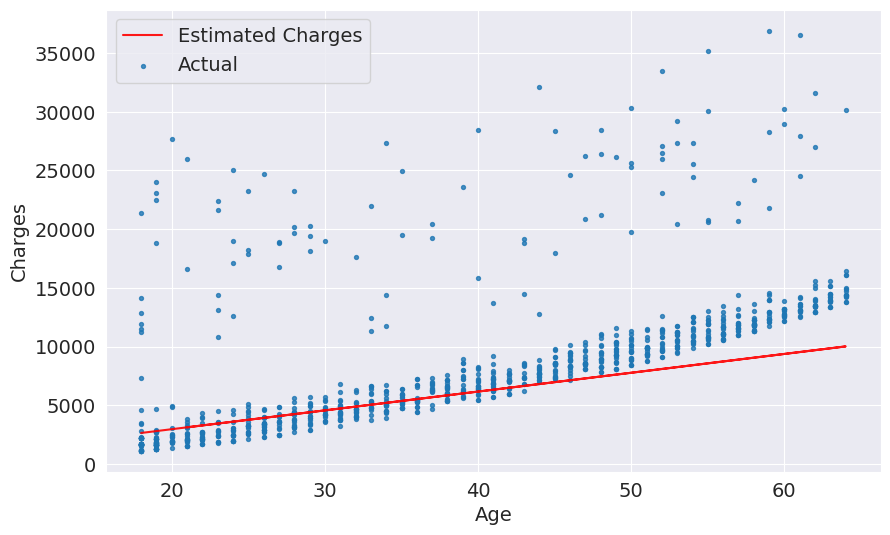

In [123]:
from sklearn.linear_model import SGDRegressor

model= SGDRegressor()
model.fit(inputs,targets)
print(rmse(targets,model.predict(inputs)))
try_parameters(model.coef_,model.intercept_)

RMSE LOSS:  10711.00334810241


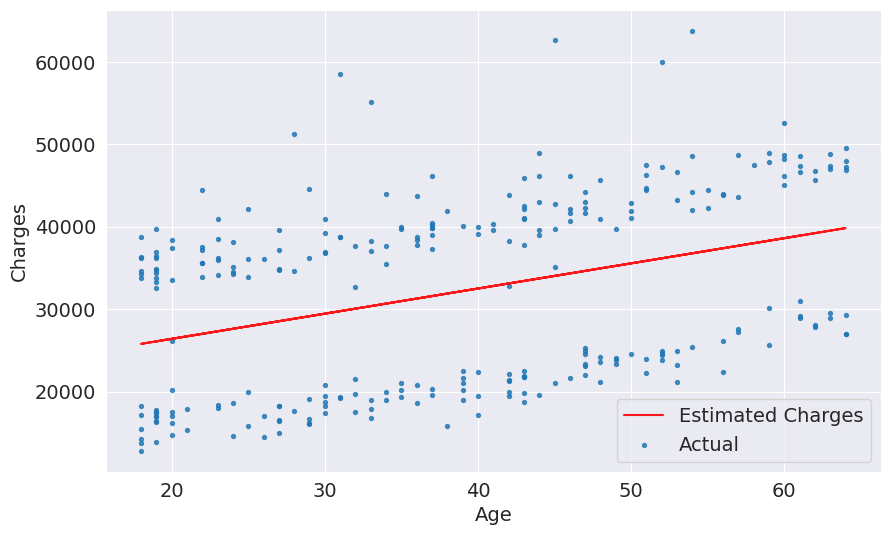

In [124]:
#for smokers
smoker_df= medical_df[medical_df['smoker']=='yes']
inputs= smoker_df[['age']]
targets= smoker_df.charges

model= LinearRegression()
model.fit(inputs, targets)
rmse(targets, model.predict(inputs))

def try_parametersss(w,b):
  ages=smoker_df.age
  predictions=estimate_charges(ages,w,b)
  target= smoker_df.charges

  plt.plot(ages,predictions,'r-', alpha=0.9);
  plt.scatter(ages,target,s=8,alpha=0.8);
  plt.xlabel('Age')
  plt.ylabel('Charges');
  plt.legend(['Estimated Charges', 'Actual']);

  loss = rmse(target,predictions)
  print("RMSE LOSS: ", loss)

try_parametersss(model.coef_, model.intercept_)

In [125]:
inputs, targets= non_smoker_df[['age','bmi']], non_smoker_df['charges']
model=LinearRegression().fit(inputs,targets)
predictions= model.predict(inputs)
rmse(targets,predictions)

4662.3128354612945

In [126]:
non_smoker_df.bmi.corr(non_smoker_df.charges)

0.0840365431283327

In [127]:
fig= px.scatter(non_smoker_df, x='bmi', y='charges')
fig.update_traces(marker_size=5)
fig.show()

In [128]:
model.coef_, model.intercept_

(array([266.87657817,   7.07547666]), -2293.6320906488727)

In [129]:
print(non_smoker_df.charges.corr(non_smoker_df.children))
fig= px.strip(non_smoker_df, x='children', y='charges')
fig.update_traces(marker_size=5, marker_opacity=0.5)
fig.show()

0.13892870453542192


In [130]:
inputs, target = non_smoker_df[['age','bmi','children']], non_smoker_df.charges
model= LinearRegression().fit(inputs,target)
rmse(target, model.predict(inputs))

4608.470405038247

In [131]:
inputs, target = medical_df[['age','bmi','children']], medical_df.charges
model= LinearRegression().fit(inputs,target)
rmse(target, model.predict(inputs))

11355.317901125973

###Categorical Columns

In [132]:
#Binary encoding
medical_df['smoker_code'] = medical_df.smoker.map({'yes':1, 'no':0})

In [133]:
medical_df.head()

,age,sex,bmi,children,smoker,region,charges,smoker_code
0,19,female,27.900,0,yes,southwest,16884.92400,1
1,18,male,33.770,1,no,southeast,1725.55230,0
2,28,male,33.000,3,no,southeast,4449.46200,0
3,33,male,22.705,0,no,northwest,21984.47061,0
4,32,male,28.880,0,no,northwest,3866.85520,0


In [134]:
medical_df.charges.corr(medical_df.smoker_code)

0.787251430498478

In [135]:
inputs, targets = medical_df[['age','bmi','children','smoker_code']], medical_df.charges
model= LinearRegression().fit(inputs,targets)
rmse(targets, model.predict(inputs))

6056.439217188081

In [136]:
medical_df['sex_code'] = medical_df['sex'].map({'female': 0, 'male': 1})

In [137]:
inputs, targets = medical_df[['age','bmi','children','smoker_code','sex_code']], medical_df.charges
model= LinearRegression().fit(inputs,targets)
rmse(targets, model.predict(inputs))

6056.100708754546

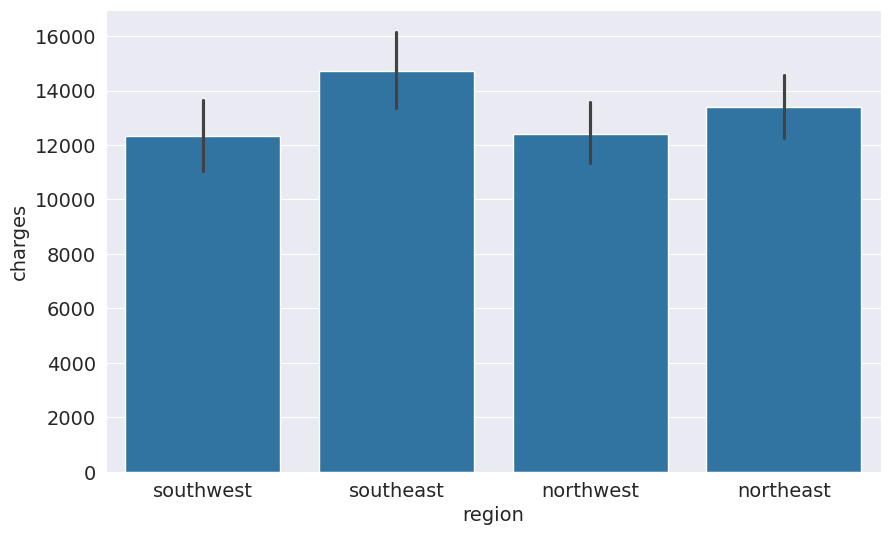

In [138]:
#One-Hot encoding
sns.barplot(data=medical_df, x='region', y='charges');

In [139]:
from sklearn import preprocessing
enc = preprocessing.OneHotEncoder()
enc.fit(medical_df[['region']])
enc.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [140]:
medical_df[['northeast', 'northwest', 'southeast', 'southwest']] = enc.transform(medical_df[['region']]).toarray()
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,1,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1,0.0,1.0,0.0,0.0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,1.0,0.0,0.0,0.0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0,0.0,0.0,1.0,0.0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0,0.0,0.0,0.0,1.0


In [141]:
inputs = medical_df[['age','bmi','children','smoker_code','sex_code','northeast', 'northwest', 'southeast', 'southwest']]
targets = medical_df.charges
model= LinearRegression().fit(inputs,targets)
rmse(targets, model.predict(inputs))

6041.6796511744515

In [142]:
# non_smoker_df['sex_code'] = non_smoker_df.sex.map({'female': 0, 'male': 1})
# enc1 = preprocessing.OneHotEncoder()
# enc1.fit(non_smoker_df[['region']])
# non_smoker_df[['northeast', 'northwest', 'southeast', 'southwest']] = enc1.transform(non_smoker_df[['region']]).toarray()
# non_smoker_df.head()
# inputs = non_smoker_df[['age','bmi','children','sex_code','northeast', 'northwest', 'southeast', 'southwest']]
# targets = non_smoker_df.charges
# model= LinearRegression().fit(inputs,targets)
# rmse(targets, model.predict(inputs))

In [143]:
# smoker_df['sex_code'] = smoker_df.sex.map({'female': 0, 'male': 1})
# enc2 = preprocessing.OneHotEncoder()
# enc2.fit(smoker_df[['region']])
# smoker_df[['northeast', 'northwest', 'southeast', 'southwest']] = enc2.transform(smoker_df[['region']]).toarray()
# smoker_df.head()
# inputs = smoker_df[['age','bmi','children','sex_code','northeast', 'northwest', 'southeast', 'southwest']]
# targets = smoker_df.charges
# model= LinearRegression().fit(inputs,targets)
# rmse(targets, model.predict(inputs))
# smoker_df.head()

#Standardization

In [145]:
# weights_df = pd.DataFrame({
#     'feature' : np.append(input_cols, 1),
#     'weight' : np.append(model.coef_ , model.intercept_)
# })
# weights_df

In [146]:
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,1,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1,0.0,1.0,0.0,0.0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,1.0,0.0,0.0,0.0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0,0.0,0.0,1.0,0.0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0,0.0,0.0,0.0,1.0


In [147]:
from sklearn.preprocessing import StandardScaler

In [148]:
numeric_cols = ['age','bmi','children']
scaler = StandardScaler()
scaler.fit(medical_df[numeric_cols])

StandardScaler()

In [149]:
scaler.mean_

array([39.20702541, 30.66339686,  1.09491779])

In [150]:
scaler.var_

array([197.25385199,  37.16008997,   1.45212664])

In [151]:
scaled_inputs = scaler.transform(medical_df[numeric_cols])
scaled_inputs

array([[-1.43876426, -0.45332   , -0.90861367],
       [-1.50996545,  0.5096211 , -0.07876719],
       [-0.79795355,  0.38330685,  1.58092576],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367],
       [-1.29636188, -0.79781341, -0.90861367],
       [ 1.55168573, -0.26138796, -0.90861367]])

In [152]:
cat_cols = ['smoker_code','sex_code','northeast', 'northwest', 'southeast', 'southwest']
categorical_data = medical_df[cat_cols].values

In [153]:
inputs = np.concatenate((scaled_inputs, categorical_data), axis=1)
targets= medical_df.charges
model= LinearRegression().fit(inputs,targets)
rmse(targets, model.predict(inputs))

6041.6796511744515

In [154]:
weights_df = pd.DataFrame({
    'feature' : np.append(numeric_cols + cat_cols, 1),
    'weight' : np.append(model.coef_ , model.intercept_)
})
weights_df.sort_values('weight',ascending=False)

,feature,weight
3,smoker_code,23848.534542
9,1,8466.483215
0,age,3607.472736
1,bmi,2067.691966
5,northeast,587.009235
2,children,572.998210
6,northwest,234.045336
4,sex_code,-131.314359
8,southwest,-373.041756
7,southeast,-448.012814


In [155]:
new_customer = [[28,30,2,1,0,0,1,0,0]]
scaler.transform([[28,30,2]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



array([[-0.79795355, -0.10882659,  0.75107928]])

In [156]:
model.predict([[-0.79795355, -0.10882659,  0.75107928, 1,0,0,1,0,0.]])

array([29875.81463371])

#Creating a Test Set

In [157]:
from sklearn.model_selection import train_test_split

In [158]:
inputs_train, inputs_test, targets_train, targets_test = train_test_split(inputs, targets, test_size=0.1)

In [159]:
model = LinearRegression().fit(inputs_train, targets_train)
predictions_test = model.predict(inputs_test)
rmse(targets_test, predictions_test)

6473.748731344434

In [160]:
predictions_train = model.predict(inputs_train)
loss= rmse(targets_train, predictions_train)
loss

5993.186758008628

In [162]:
import pickle
with open('linear_regression_model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [163]:
from google.colab import files
files.download('linear_regression_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>